In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re

In [2]:
import komma_dev.eu
from komma_dev.vocabulary import build_vocabulary
from komma_dev.parsing import StringParser

# Analysis of the EU corpus

## Loading the data

In [3]:
eu_data_raw = komma_dev.eu.load('da')

loading: europarl-v7.da-en.da


In [4]:
eu_data_raw = [line.strip() for line in eu_data_raw]

In [5]:
parser = StringParser()
eu_data = [parser.parse(line) for line in eu_data_raw]

In [6]:
len(eu_data)

1968800

In [7]:
eu_data[1].text

'Jeg erklærer Europa-Parlamentets session, der blev afbrudt fredag den 17. december, for genoptaget. Endnu en gang vil jeg ønske Dem godt nytår, og jeg håber, De har haft en god ferie.'

## Distribution of words in the sentences

In [8]:
sen_len = [len(sentence.text.split()) for sentence in eu_data]

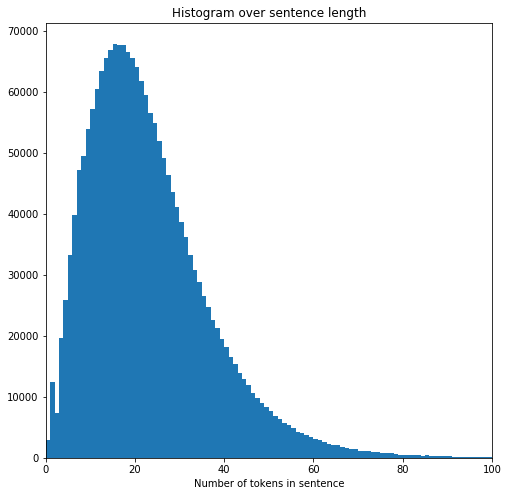

In [9]:
fix, ax = plt.subplots(figsize=(8,8))
ax.hist(sen_len, bins=np.arange(0,200));
ax.set_xlim([0, 100])
ax.set(xlabel='Number of tokens in sentence', title='Histogram over sentence length');

Using a sentence length of 100 words will get the vast majority of words. Using 50 as we do now still leaves out quite a chunk of sentences.

In [10]:
np.sum(np.array(sen_len)>50)/np.sum(np.array(sen_len)>0)*100

4.1769756653373484

So 4% of the sentences include more than 50 tokens.

## Analysing the vocabulary

In [11]:
cleaned_sentences = [re.sub("\s,", ',', sentence.text) for sentence in eu_data]

In [12]:
corpus = ' '.join(cleaned_sentences)
len(Counter(corpus.split()))

645152

With the current dataset it should not be necessary to increase vocabulary size above 65k

In [13]:
lower = [sentence.text.lower() for sentence in eu_data]

In [14]:
lower_corpus = ' '.join(lower)
len(Counter(lower_corpus.split()))

609291

so about 4k of the words are different simply because of capitalization.